In [99]:
import networkx as nx
import itertools
from networkx.algorithms import community
import numpy as np
zkc =  nx.karate_club_graph()


#ground_truth = np.array([0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1])
ground_truth = np.array([1,1,2,1,0,0,0,1,3,2,0,1,1,1,3,3,0,1,3,1,3,1,3,3,2,2,3,2,2,3,3,2,3,3])

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [9])
([0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [4, 5, 6, 10, 16], [9])


In [ ]:
k = 3
comp = community.girvan_newman(zkc)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities)) 

In [100]:
y_group = tuple(sorted(c) for c in communities)

In [101]:
partition = {}
for idx, c in enumerate(communities):
    for item in (c):
        partition[item] = idx
#partition

{0: 0,
 1: 0,
 3: 0,
 7: 0,
 11: 0,
 12: 0,
 13: 0,
 17: 0,
 19: 0,
 21: 0,
 32: 1,
 33: 1,
 2: 1,
 8: 1,
 14: 1,
 15: 1,
 18: 1,
 20: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 4: 2,
 5: 2,
 6: 2,
 10: 2,
 16: 2,
 9: 3}

34.0


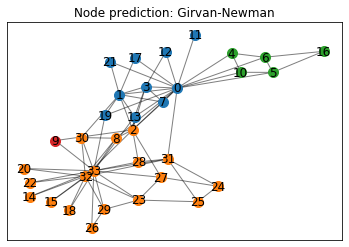

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
def get_node_color(input):
    if input==1:
        return "red"
    elif input==2:
        return "green"
    elif input==3:
        return "blue"
    elif input ==4:
        return "yellow"

#drawing
size = float(len(ground_truth))
print(size)
pos = nx.spring_layout(zkc)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(zkc, pos, list_nodes, node_size = 100,
                                node_color = get_node_color(count / size))


nx.draw_networkx_edges(zkc, pos, alpha=0.5)
nx.draw_networkx_labels(zkc, pos)
plt.title('Node prediction: Girvan-Newman')
plt.show()

In [103]:
from sklearn import metrics
import collections
od = collections.OrderedDict(sorted(partition.items()))
partition_array = np.array(list(od.values()))
print(metrics.adjusted_rand_score(ground_truth, partition_array))
print(metrics.adjusted_mutual_info_score(ground_truth, partition_array))
print(metrics.accuracy_score(ground_truth, partition_array))
print(ground_truth)
print(partition_array)

0.6812453561386383
0.8014453425342631
0.0
[1 1 2 1 0 0 0 1 3 2 0 1 1 1 3 3 0 1 3 1 3 1 3 3 2 2 3 2 2 3 3 2 3 3]
[0 0 1 0 2 2 2 0 1 3 2 0 0 0 1 1 2 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
